### **Problem Statement:**
Complete preprocessing of a Traffic dataset by handling missing values, using encoders and applying scalors wherever needed. Use the processed data for predicting Traffic Condition. Use the concept of pipeline for deploying. Also check AUC-ROC curve to get the best fit model and then do the prediction.

### **Objective:**
The goal is to complete preprocessing of the data using column transformer - handle missing values, encoding, scaling while learning the use of AUC-ROC curve to get the best fit model to use it

## **Approach**
1. **Preprocess Data** – Handle missing values, scale numerical data, and encode categorical features.  
2. **Create Pipeline** – Combine preprocessing with `LogisticRegression`.  
3. **Train & Cross-Validate** – Split data, train the model, and evaluate using `cross_val_score`.  
4. **Hyperparameter Tuning** – Use `GridSearchCV` to find the best `C` and `penalty`.  
5. **Evaluate Model** – Predict on the test set and print accuracy.

## Load Data Set

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython.display import display, Image
import warnings
warnings.simplefilter('ignore')


In [3]:
import pandas as pd
df= pd.read_csv("C - C.csv")
df

,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,40.842275,-73.703149,NaN,49.893435,82.652780,Yellow,Clear,0.0,-0.609199,2.0,45.0,450.760055,19.574337,High
1,40.831119,-73.987354,NaN,22.383965,45.829298,Green,Clear,0.0,0.965442,16.0,1.0,321.800341,5.385554,High
2,40.819549,-73.732462,NaN,46.889699,82.772465,Green,Rain,0.0,0.289660,16.0,49.0,231.152655,10.277477,High
3,40.725849,-73.980134,NaN,5.730536,37.695567,Red,Fog,0.0,-0.271965,66.0,NaN,410.384292,29.243279,High
4,NaN,-73.961631,NaN,61.348034,22.313358,Red,Snow,0.0,-0.797606,3.0,5.0,NaN,16.801459,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40.604663,-73.831032,NaN,NaN,12.670629,Green,Rain,0.0,0.698929,87.0,28.0,252.070807,7.511153,High
4996,40.733790,-73.752213,NaN,NaN,NaN,NaN,Snow,0.0,0.742800,5.0,NaN,NaN,6.681980,Low
4997,40.821354,-73.759376,NaN,59.492981,78.719110,Yellow,Clear,0.0,0.524574,94.0,16.0,71.660296,25.267246,Medium
4998,40.772343,-73.836698,NaN,NaN,64.690719,Yellow,Rain,0.0,-0.589902,73.0,5.0,442.692618,29.467326,Medium


In [4]:
df.isnull().mean()

Latitude                  0.0124
Longitude                 0.0070
Vehicle_Count             0.0110
Traffic_Speed_kmh         0.0102
Road_Occupancy_%          0.0098
Traffic_Light_State       0.0036
Weather_Condition         0.0046
Accident_Report           0.0036
Sentiment_Score           0.0080
Ride_Sharing_Demand       0.0066
Parking_Availability      0.0088
Emission_Levels_g_km      0.0078
Energy_Consumption_L_h    0.0064
Traffic_Condition         0.0000
dtype: float64

## Handle Missing Value According to Distribution

<Axes: xlabel='Latitude', ylabel='Count'>

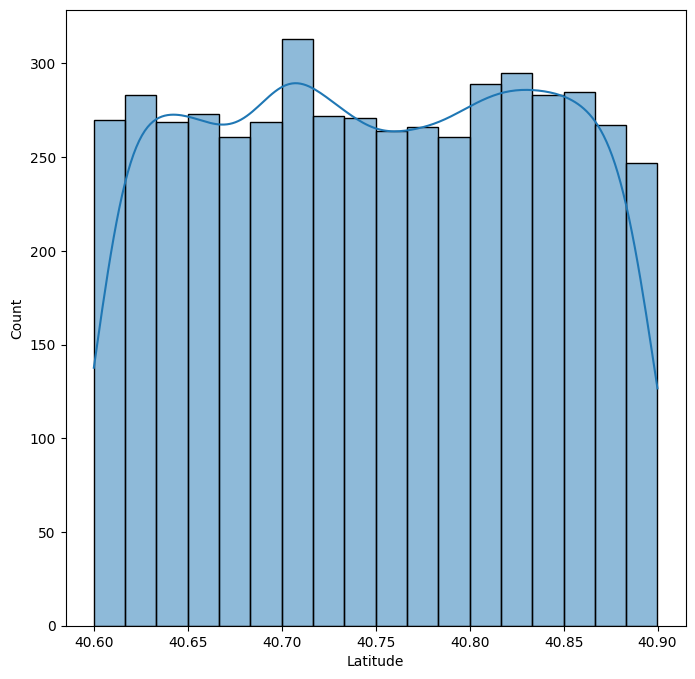

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='Latitude',kde=True)

<Axes: xlabel='Longitude', ylabel='Count'>

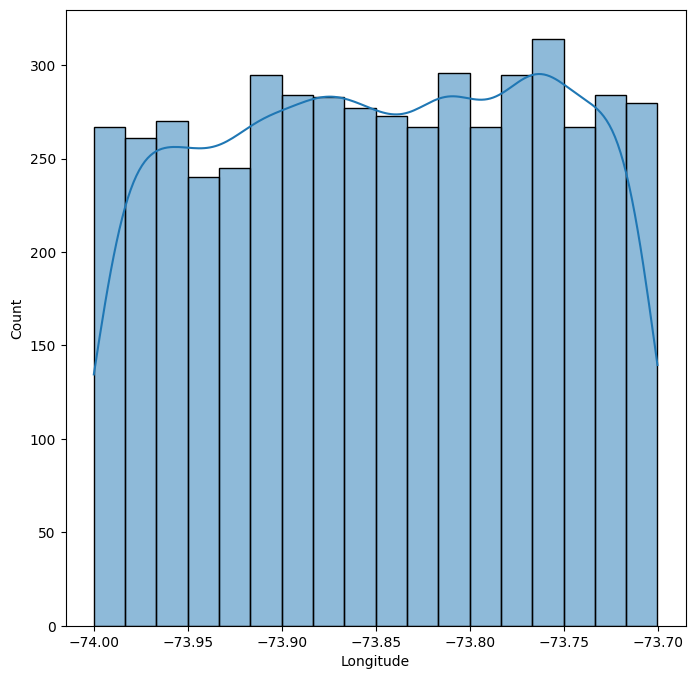

In [6]:
sns.histplot(data=df, x='Longitude',kde=True)

<Axes: xlabel='Vehicle_Count', ylabel='Count'>

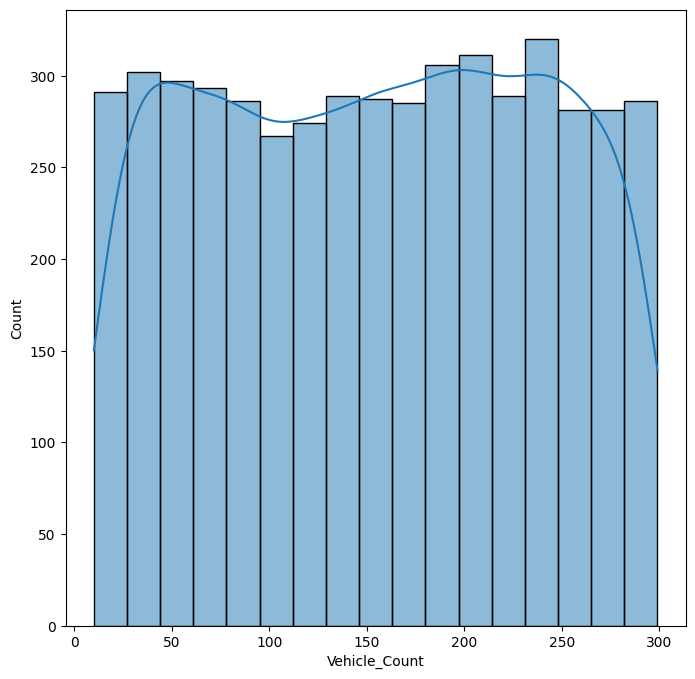

In [7]:
sns.histplot(data=df, x='Vehicle_Count',kde=True)

<Axes: xlabel='Traffic_Speed_kmh', ylabel='Count'>

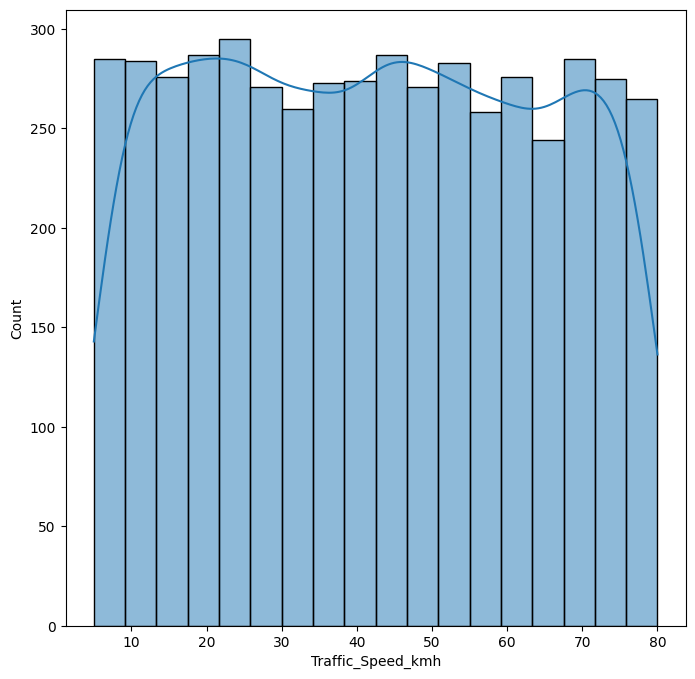

In [8]:
sns.histplot(data=df, x='Traffic_Speed_kmh',kde=True)

<Axes: xlabel='Traffic_Speed_kmh', ylabel='Count'>

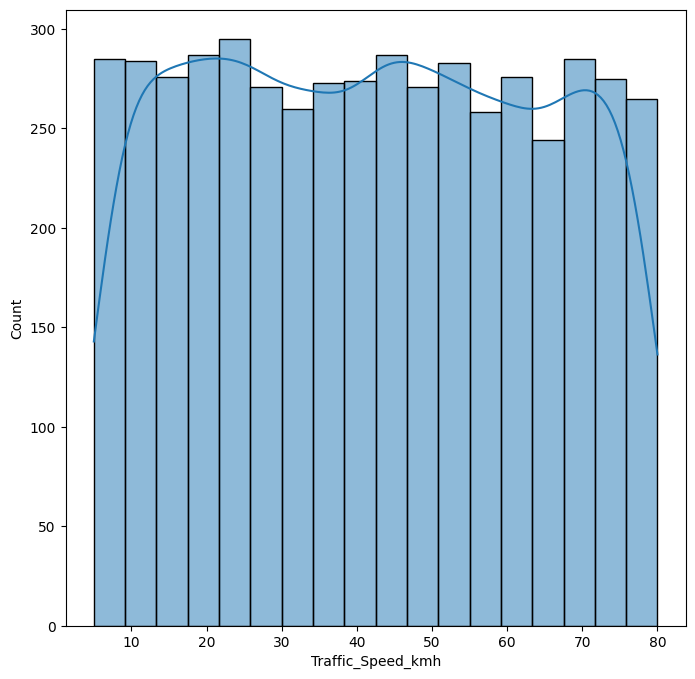

In [9]:
sns.histplot(data=df, x='Traffic_Speed_kmh',kde=True)

<Axes: xlabel='Road_Occupancy_%', ylabel='Count'>

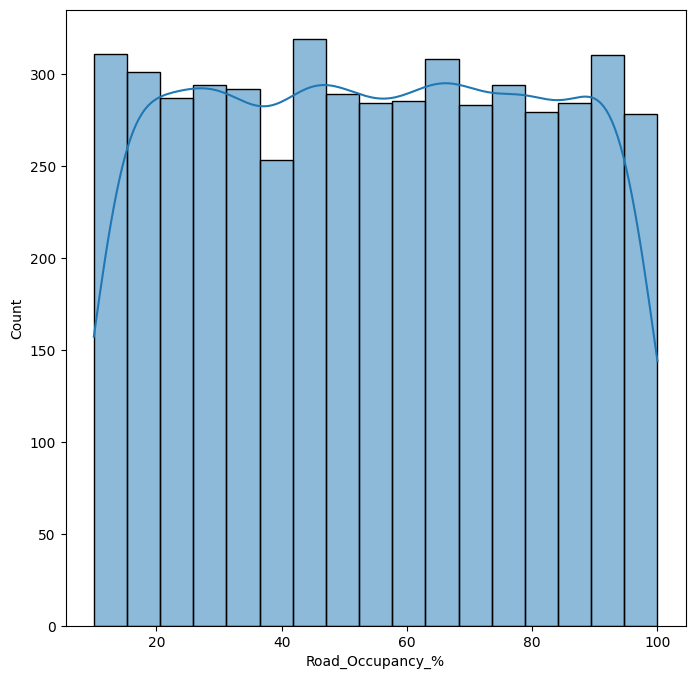

In [10]:
sns.histplot(data=df, x='Road_Occupancy_%',kde=True)

<Axes: xlabel='Accident_Report', ylabel='Count'>

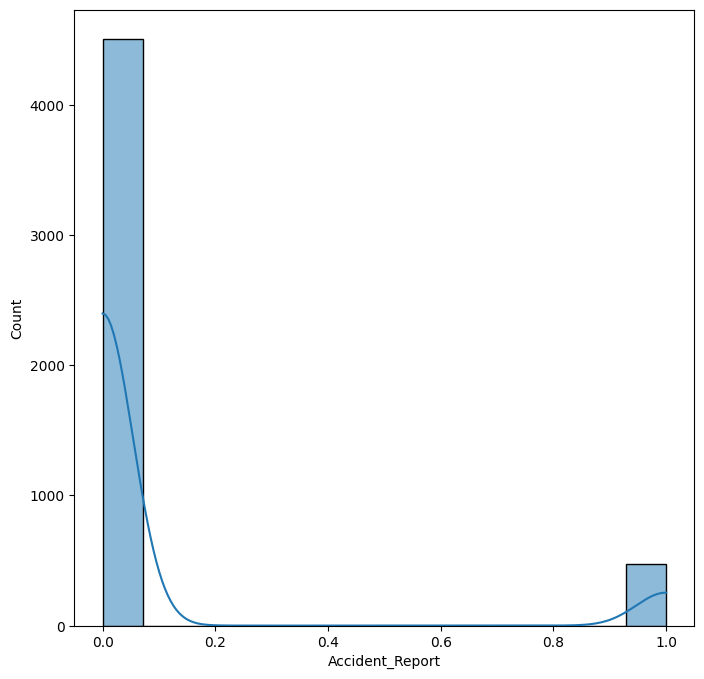

In [11]:
sns.histplot(data=df, x='Accident_Report',kde=True)

<Axes: xlabel='Sentiment_Score', ylabel='Count'>

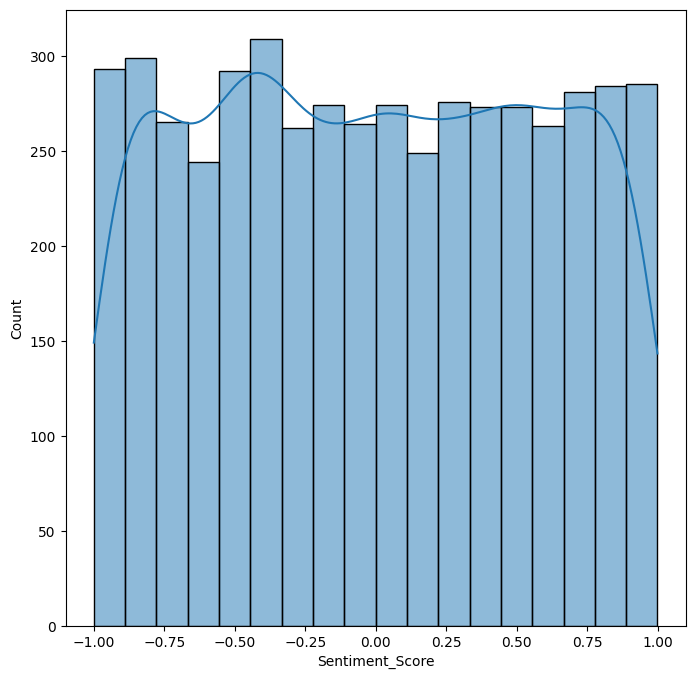

In [12]:
sns.histplot(data=df, x='Sentiment_Score',kde=True)

<Axes: xlabel='Ride_Sharing_Demand', ylabel='Count'>

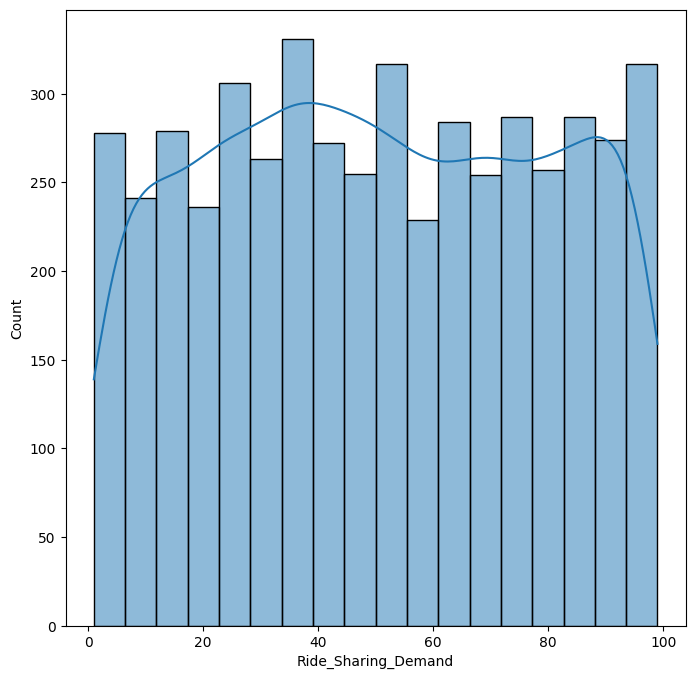

In [13]:
sns.histplot(data=df, x='Ride_Sharing_Demand',kde=True)

<Axes: xlabel='Traffic_Light_State', ylabel='Count'>

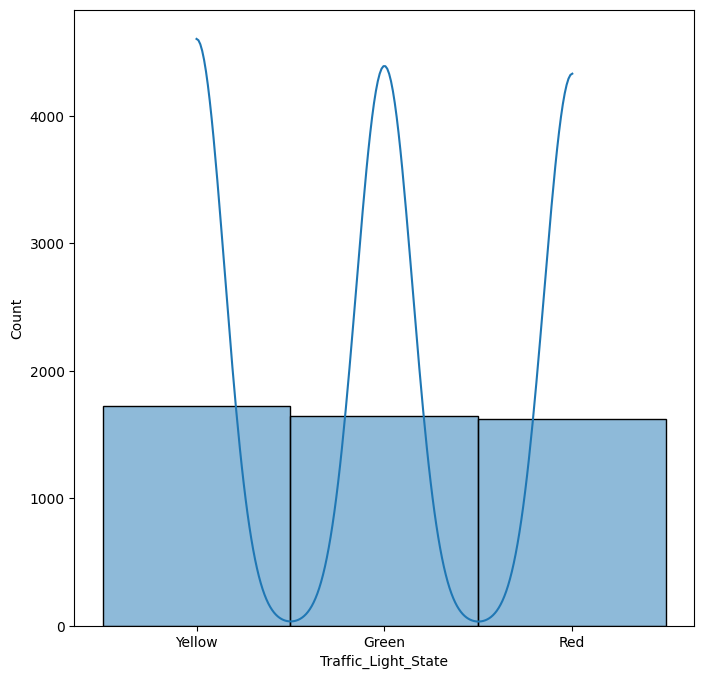

In [14]:
sns.histplot(data=df, x='Traffic_Light_State',kde=True)

In [15]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class RandomSampleImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        """Fit method to store non-null values for each column."""
        self.filled_values = {}
        X_df = pd.DataFrame(X)  # Convert to DataFrame for processing
        for col in X_df.columns:
            self.filled_values[col] = X_df[col].dropna().to_numpy()  # Store non-null values
        return self  # Return self to allow chaining
    
    def transform(self, X):
        """Replace missing values with a random sample."""
        X_df = pd.DataFrame(X)  # Convert back to DataFrame
        for col in X_df.columns:
            missing = X_df[col].isnull()
            num_missing = missing.sum()
            if num_missing > 0 and len(self.filled_values[col]) > 0:
                X_df.loc[missing, col] = np.random.choice(self.filled_values[col], num_missing, replace=True)
        return X_df.to_numpy()  # Return as NumPy array for ColumnTransformer compatibility
    def set_output(self, transform): 
        return self
eod_value = df['Vehicle_Count'].mean() + 3*df['Vehicle_Count'].std()
imp_constant = SimpleImputer(strategy='constant', fill_value=-eod_value)  # For categorical columns
imp_mean = SimpleImputer(strategy='mean') 
imp_median = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent') # For numerical columns
imp_random = RandomSampleImputer()  # Custom random imputer

column_transformer = ColumnTransformer([
                    ('Latitude', imp_mean, ['Latitude']),
                    ('Longitude', imp_mean, ['Longitude']),
                    ('Vehicle_Count', imp_constant, ['Vehicle_Count']),
                    ('Traffic_Speed_kmh',imp_mean,['Traffic_Speed_kmh']),
                    ('Road_Occupancy_%', imp_mean, ['Road_Occupancy_%']),  # Example numerical column
                    ('Weather_Condition', imp_mode, ['Weather_Condition']),
                    ('Accident_Report', imp_mode, ['Accident_Report']),
                    ('Sentiment_Score', imp_mean, ['Sentiment_Score']),
                    ('Ride_Sharing_Demand', imp_mean, ['Ride_Sharing_Demand']),
                    ('Parking_Availability', imp_mean, ['Parking_Availability']),
                    ('Emission_Levels_g_km', imp_mean, ['Emission_Levels_g_km']),
                    ('Traffic_Light_State',imp_mode,['Traffic_Light_State']),
                    ('Energy_Consumption_L_h', imp_mean, ['Energy_Consumption_L_h']),
                    ],
                     remainder='passthrough')  # Keep other columns unchanged

df_imputed = column_transformer.fit_transform(df)

new_column_names = ['Latitude', 'Longitude', 'Vehicle_Count', 'Traffic_Speed_kmh', 'Road_Occupancy_%','Weather_Condition',
                    'Accident_Report','Sentiment_Score','Ride_Sharing_Demand','Parking_Availability', 'Emission_Levels_g_km','Energy_Consumption_L_h',] + \
                   [col for col in df.columns if col not in 
                    ['Latitude', 'Longitude', 'Vehicle_Count', 'Traffic_Speed_kmh', 'Road_Occupancy_%','Weather_Condition' ,'Accident_Report','Sentiment_Score','Ride_Sharing_Demand','Parking_Availability', 'Emission_Levels_g_km','Energy_Consumption_L_h']]

df_imputed = pd.DataFrame(df_imputed, columns=new_column_names)

print("Original DataFrame:")
display(df)
print("\nDataFrame after Imputation:")
display(df_imputed)


Original DataFrame:


,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,40.842275,-73.703149,NaN,49.893435,82.652780,Yellow,Clear,0.0,-0.609199,2.0,45.0,450.760055,19.574337,High
1,40.831119,-73.987354,NaN,22.383965,45.829298,Green,Clear,0.0,0.965442,16.0,1.0,321.800341,5.385554,High
2,40.819549,-73.732462,NaN,46.889699,82.772465,Green,Rain,0.0,0.289660,16.0,49.0,231.152655,10.277477,High
3,40.725849,-73.980134,NaN,5.730536,37.695567,Red,Fog,0.0,-0.271965,66.0,NaN,410.384292,29.243279,High
4,NaN,-73.961631,NaN,61.348034,22.313358,Red,Snow,0.0,-0.797606,3.0,5.0,NaN,16.801459,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40.604663,-73.831032,NaN,NaN,12.670629,Green,Rain,0.0,0.698929,87.0,28.0,252.070807,7.511153,High
4996,40.733790,-73.752213,NaN,NaN,NaN,NaN,Snow,0.0,0.742800,5.0,NaN,NaN,6.681980,Low
4997,40.821354,-73.759376,NaN,59.492981,78.719110,Yellow,Clear,0.0,0.524574,94.0,16.0,71.660296,25.267246,Medium
4998,40.772343,-73.836698,NaN,NaN,64.690719,Yellow,Rain,0.0,-0.589902,73.0,5.0,442.692618,29.467326,Medium



DataFrame after Imputation:


,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Light_State,Traffic_Condition
0,40.842275,-73.703149,-404.710784,49.893435,82.65278,Clear,0.0,-0.609199,2.0,45.0,450.760055,Yellow,19.574337,High
1,40.831119,-73.987354,-404.710784,22.383965,45.829298,Clear,0.0,0.965442,16.0,1.0,321.800341,Green,5.385554,High
2,40.819549,-73.732462,-404.710784,46.889699,82.772465,Rain,0.0,0.28966,16.0,49.0,231.152655,Green,10.277477,High
3,40.725849,-73.980134,-404.710784,5.730536,37.695567,Fog,0.0,-0.271965,66.0,24.667474,410.384292,Red,29.243279,High
4,40.749597,-73.961631,-404.710784,61.348034,22.313358,Snow,0.0,-0.797606,3.0,5.0,272.458261,Red,16.801459,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40.604663,-73.831032,-404.710784,42.089163,12.670629,Rain,0.0,0.698929,87.0,28.0,252.070807,Green,7.511153,High
4996,40.73379,-73.752213,-404.710784,42.089163,54.759486,Snow,0.0,0.7428,5.0,24.667474,272.458261,Yellow,6.68198,Low
4997,40.821354,-73.759376,-404.710784,59.492981,78.71911,Clear,0.0,0.524574,94.0,16.0,71.660296,Yellow,25.267246,Medium
4998,40.772343,-73.836698,-404.710784,42.089163,64.690719,Rain,0.0,-0.589902,73.0,5.0,442.692618,Yellow,29.467326,Medium


In [16]:
df_imputed.isnull().mean()

Latitude                  0.0
Longitude                 0.0
Vehicle_Count             0.0
Traffic_Speed_kmh         0.0
Road_Occupancy_%          0.0
Weather_Condition         0.0
Accident_Report           0.0
Sentiment_Score           0.0
Ride_Sharing_Demand       0.0
Parking_Availability      0.0
Emission_Levels_g_km      0.0
Energy_Consumption_L_h    0.0
Traffic_Light_State       0.0
Traffic_Condition         0.0
dtype: float64

In [17]:
df_imputed.drop('Traffic_Condition', axis=1)
df_imputed.drop('Traffic_Light_State', axis=1)
df_imputed.drop('Energy_Consumption_L_h', axis=1)

,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Traffic_Light_State,Traffic_Condition
0,40.842275,-73.703149,-404.710784,49.893435,82.65278,Clear,0.0,-0.609199,2.0,45.0,450.760055,19.574337,High
1,40.831119,-73.987354,-404.710784,22.383965,45.829298,Clear,0.0,0.965442,16.0,1.0,321.800341,5.385554,High
2,40.819549,-73.732462,-404.710784,46.889699,82.772465,Rain,0.0,0.28966,16.0,49.0,231.152655,10.277477,High
3,40.725849,-73.980134,-404.710784,5.730536,37.695567,Fog,0.0,-0.271965,66.0,24.667474,410.384292,29.243279,High
4,40.749597,-73.961631,-404.710784,61.348034,22.313358,Snow,0.0,-0.797606,3.0,5.0,272.458261,16.801459,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40.604663,-73.831032,-404.710784,42.089163,12.670629,Rain,0.0,0.698929,87.0,28.0,252.070807,7.511153,High
4996,40.73379,-73.752213,-404.710784,42.089163,54.759486,Snow,0.0,0.7428,5.0,24.667474,272.458261,6.68198,Low
4997,40.821354,-73.759376,-404.710784,59.492981,78.71911,Clear,0.0,0.524574,94.0,16.0,71.660296,25.267246,Medium
4998,40.772343,-73.836698,-404.710784,42.089163,64.690719,Rain,0.0,-0.589902,73.0,5.0,442.692618,29.467326,Medium


## Encoding and Scaling

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
encod1=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encod2=OrdinalEncoder(categories=[['Red','Yellow','Green']])
encod5=OrdinalEncoder(categories=[['Clear', 'Rain', 'Fog', 'Snow']])
encod3=TargetEncoder()
encod4=OrdinalEncoder(categories=[['Rural','Semiurban','Urban']])
scalar_standard = StandardScaler()  # Standard Scaler
scaler_maxabs = MaxAbsScaler()  # Max Abs Scaler
scaler_robust = RobustScaler() 

In [19]:
target_column = 'Traffic_Condition'  # Change this to your actual target column name
X = df_imputed.drop(columns=[target_column])
y = df_imputed[target_column]

In [20]:
df['Latitude'].unique()

array([40.84227529, 40.8311194 , 40.81954876, ..., 40.82135367,
       40.77234305, 40.75668794])

In [21]:
df['Longitude'].unique()

array([-73.70314869, -73.98735409, -73.73246186, ..., -73.75937617,
       -73.83669765, -73.84933524])

In [22]:
df['Vehicle_Count'].unique()

array([ nan, 114.,  17.,  80., 231., 175., 188., 167.,  91., 232., 218.,
       178., 184.,  57., 197., 120., 100., 287.,  69., 145., 284.,  79.,
        11., 271., 225., 280.,  46.,  73., 144.,  26., 299., 154., 151.,
       150., 224., 293., 286.,  14., 265.,  56., 115., 234., 246.,  13.,
       176.,  95.,  54., 200., 236., 147., 155.,  81., 255.,  99., 204.,
       276.,  12., 258.,  50., 243., 146., 238., 182.,  89., 113., 163.,
        32., 248., 187., 230., 254., 267., 206., 202.,  66., 166., 253.,
       274.,  44.,  55., 257.,  22.,  15., 278.,  75., 292., 215.,  33.,
       297.,  63., 270.,  67., 141., 157., 264.,  34.,  83., 118., 242.,
       222., 162., 136., 235.,  82.,  94.,  31.,  10., 117.,  35.,  77.,
        92.,  85., 108., 205., 142.,  41., 195., 228., 159.,  53., 104.,
       194., 294., 110., 199.,  37., 116., 249., 269., 250., 192., 124.,
       211., 107., 181., 139., 148.,  59., 198.,  60., 237., 273., 281.,
       168.,  47.,  39.,  76., 244.,  88.,  64., 17

In [23]:
df['Traffic_Speed_kmh'].unique()

array([49.8934348 , 22.38396487, 46.88969944, ..., 67.80662234,
       59.49298074, 51.47376854])

In [24]:
df['Weather_Condition'].unique()

array(['Clear', 'Rain', 'Fog', 'Snow', nan], dtype=object)

In [25]:
df['Accident_Report'].unique()

array([ 0., nan,  1.])

In [26]:
df['Traffic_Light_State'].unique()

array(['Yellow', 'Green', 'Red', nan], dtype=object)

In [27]:
df_imputed['Vehicle_Count'] = df_imputed['Vehicle_Count'].clip(lower=0)

In [28]:
numerical_cols = [
    'Latitude', 'Longitude', 'Vehicle_Count', 'Traffic_Speed_kmh',
    'Road_Occupancy_%', 'Accident_Report', 'Sentiment_Score',
    'Ride_Sharing_Demand', 'Parking_Availability',
    'Emission_Levels_g_km'
]

categorical_cols = ['Traffic_Light_State', 'Weather_Condition']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, categorical_cols)
])

In [29]:
# Check class balance
print("\nClass Distribution in Target Variable:")
print(y.value_counts(normalize=True))


Class Distribution in Target Variable:
Traffic_Condition
High      0.6332
Medium    0.2950
Low       0.0718
Name: proportion, dtype: float64


## **Logistic Regression**

In [42]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=1, penalty='l2'))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.7420


In [39]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Define hyperparameter grid for Logistic Regression
param_grid = {
    "classifier__penalty": ['l1', 'l2'],
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)



Cross-Validation Accuracy: 0.7590 ± 0.0209
0.7590000000000001
{'classifier__C': 1, 'classifier__penalty': 'l2'}


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Train Accuracy: 0.92225
Test Accuracy: 0.742
Confusion Matrix:
 [[561   7  65]
 [  0  27  33]
 [136  17 154]]


## **Use K-Nearest Classifier**

A pipeline in programming refers to a series of connected data-processing steps, where the output of one step becomes the input for the next. In Python, pipelines are often used for data processing, machine learning workflows, or streamlining tasks that require multiple sequential operations.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=14))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn.fit(X_train,y_train)
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

0.827
Confusion Matrix:
 [[590   0  43]
 [  2  34  24]
 [ 95   9 203]]


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Train Accuracy: 0.85125
Test Accuracy: 0.827
Confusion Matrix:
 [[590   0  43]
 [  2  34  24]
 [ 95   9 203]]


n_neighbors = 1, F1 Score: 0.7212
n_neighbors = 2, F1 Score: 0.6978
n_neighbors = 3, F1 Score: 0.7662
n_neighbors = 4, F1 Score: 0.7604
n_neighbors = 5, F1 Score: 0.7716
n_neighbors = 6, F1 Score: 0.7863
n_neighbors = 7, F1 Score: 0.7867
n_neighbors = 8, F1 Score: 0.7867
n_neighbors = 9, F1 Score: 0.7810
n_neighbors = 10, F1 Score: 0.7958
n_neighbors = 11, F1 Score: 0.8000
n_neighbors = 12, F1 Score: 0.8076
n_neighbors = 13, F1 Score: 0.8092
n_neighbors = 14, F1 Score: 0.8215
n_neighbors = 15, F1 Score: 0.8038


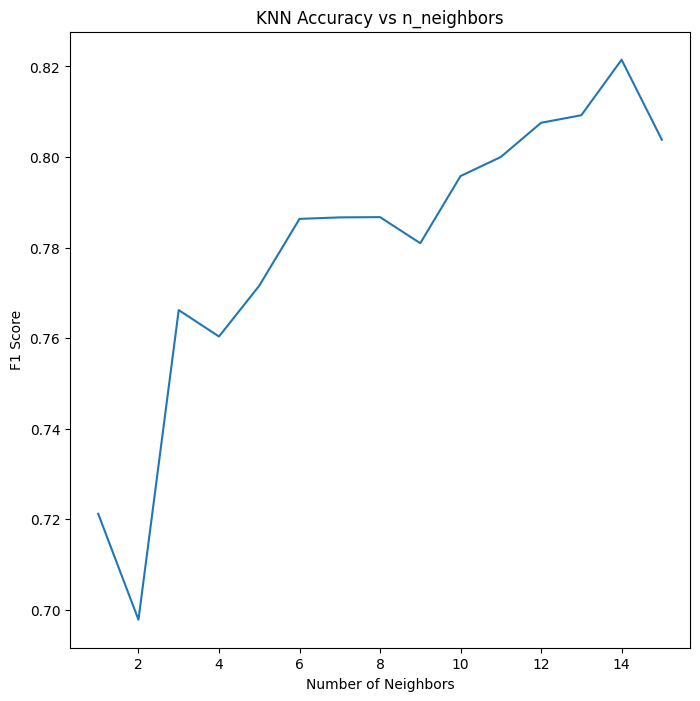

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scores = []
for i in range(1, 16):
    knn = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=i))
    ])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted') 
    print(f"n_neighbors = {i}, F1 Score: {f1:.4f}")
    
    scores.append(f1)

plt.plot(range(1, 16), scores)
plt.title("KNN Accuracy vs n_neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("F1 Score")
plt.show()


## **AUC-ROC**

AUC-ROC for KNN (k=14): 0.9246
AUC-ROC for Logistic Regression: 0.8774
AUC-ROC for Linear SVM: 0.8895


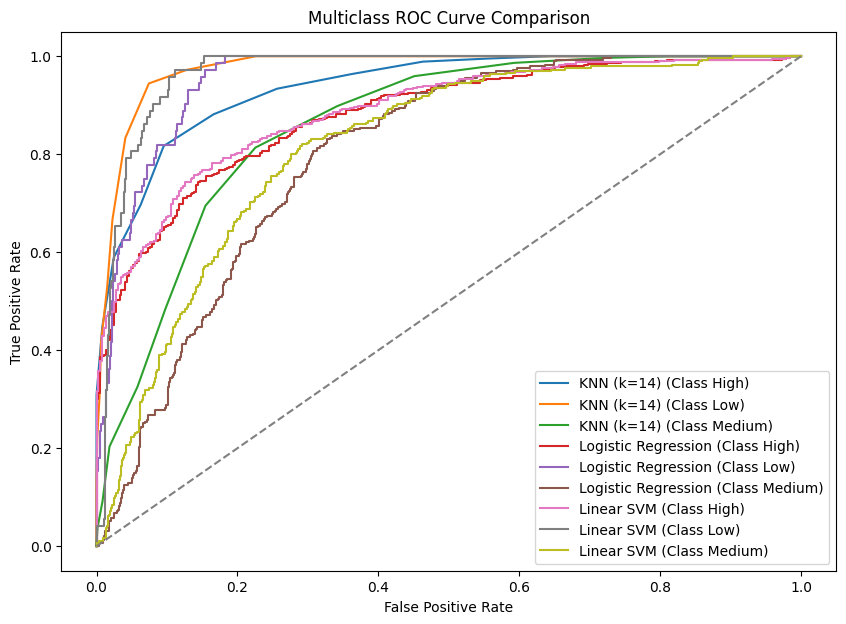

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

models = {
    "KNN (k=14)": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=14))
    ]),
    "Logistic Regression": Pipeline([
         ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', multi_class='ovr'))
    ]),
    "Linear SVM": Pipeline([
         ('preprocessor', preprocessor),
        ('classifier', SVC(kernel='linear', probability=True))
    ])
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)

    auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='macro')
    print(f"AUC-ROC for {name}: {auc:.4f}")

    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"{name} (Class {class_label})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve Comparison")
plt.legend(loc="best")
plt.show()


In [34]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
y_scores = knn.predict_proba(X_test)[:,1]
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_scores)
thresholds

array([       inf, 0.93333333, 0.8       , 0.73333333, 0.66666667,
       0.6       , 0.53333333, 0.46666667, 0.4       , 0.33333333,
       0.26666667, 0.2       , 0.13333333, 0.06666667, 0.        ])

In [35]:
import pickle
pickle.dump(models, open('models.pkl', 'wb'))

# **THANK YOU**

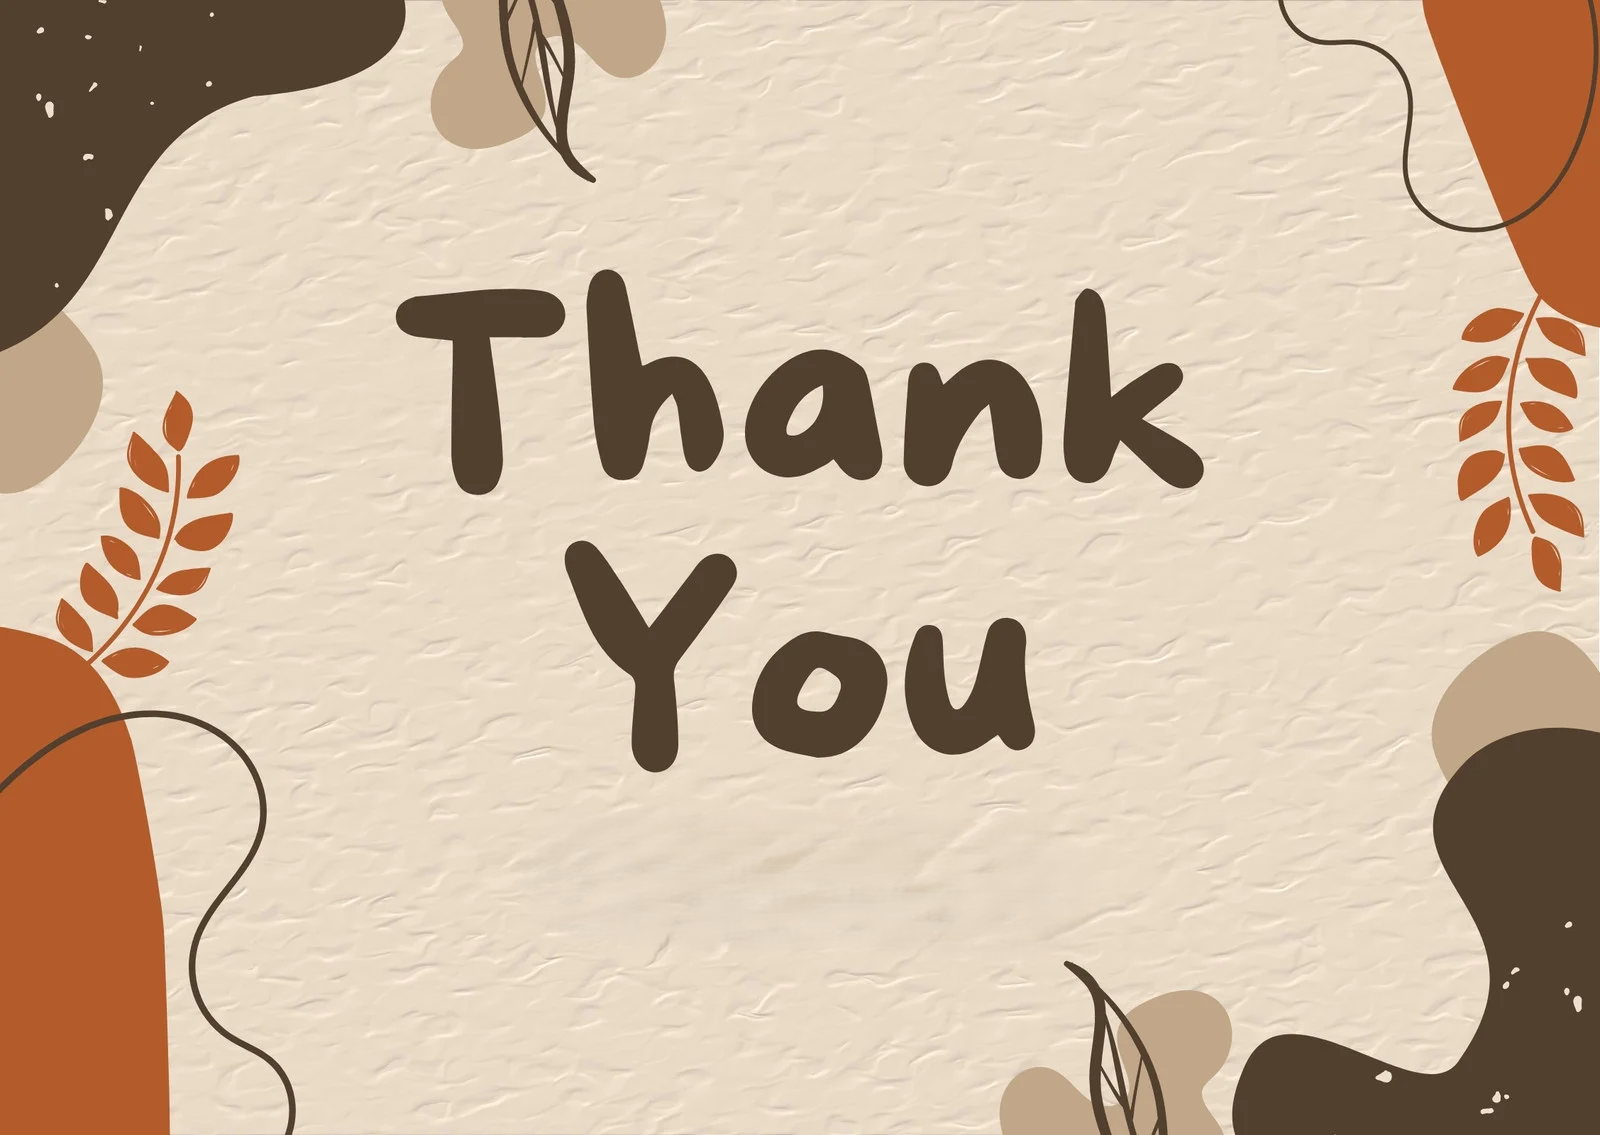

In [36]:
gif_path = r"C:\Users\shrut\Pictures\8fa519159fd729549b494dad30c3b699.png"
width = 500
height = 500
display(Image(filename=gif_path, width=width, height=height))